## Import Module

In [61]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Import Fashion Mnist Dataset

In [62]:
fashion_minst = keras.datasets.fashion_mnist

In [63]:
# return four numpy array
(train_image, train_label), (test_image, test_label) = fashion_minst.load_data()

## Explore Data

In [64]:
print("Type of 'train_image': ", type(train_image))
print("Type of 'train_label': ", type(train_label))

Type of 'train_image':  <class 'numpy.ndarray'>
Type of 'train_label':  <class 'numpy.ndarray'>


In [65]:
# every image is 28*28 pixels
print("Shape of 'train_image': ", train_image.shape)
print("Shape of 'train_label': ", train_label.shape)

Shape of 'train_image':  (60000, 28, 28)
Shape of 'train_label':  (60000,)


In [66]:
# train_label is classification label for each image
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [67]:
# label <=> class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

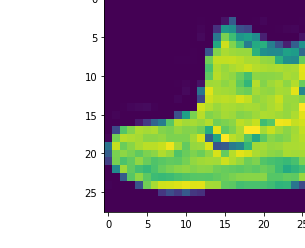

In [68]:
# show a sample image
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [69]:
# every pixel is in range 0 ~ 255
# change the range to 0 ~ 1
train_image = train_image / 255
test_image = test_image / 255

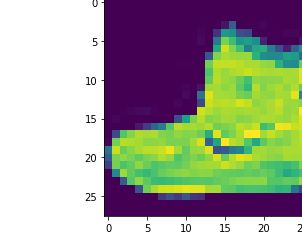

In [70]:
# show revised image
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

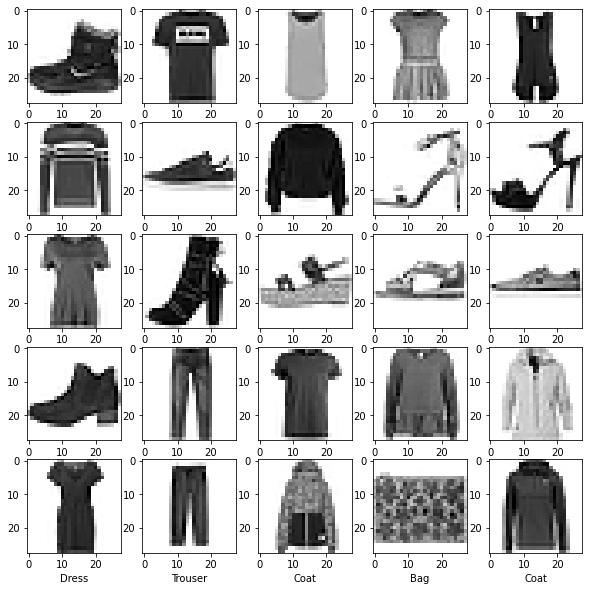

In [71]:
# show images prepared to be trained neural network
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

## Build Model

In [72]:
model = keras.models.Sequential([

    # this layer will change input shape from 28*28 to 784
    keras.layers.Flatten(input_shape=(28, 28)),

    # this layer has 28 neurons
    keras.layers.Dense(128, activation="relu"),

    # this layer has 10 neurons
    keras.layers.Dense(10)
])

In [73]:
# before training network, we should compile/set model
model.compile(
    optimizer="adam",

    # "logits": the output of classification model or a vector of raw output from model
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    metrics=["accuracy"]
)

## Train Model

In [74]:
model.fit(train_image, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 767us/step - loss: 0.4970 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.3726 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 1s 731us/step - loss: 0.3344 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 1s 757us/step - loss: 0.3096 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 1s 728us/step - loss: 0.2936 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.2796 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.2667 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.2582 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.2464 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 1s 788u

## Test Model

In [75]:
test_loss, test_accuracy = model.evaluate(test_image, test_label, verbose=2)

313/313 - 0s - loss: 0.3507 - accuracy: 0.8774


## Prediction

In [76]:
# if we want to predict the class of image, we have to get probability of each class
# hence, pass logits (a vector of raw output from model) to softmax (normalize)
probability_model = keras.Sequential([
    model,
    keras.layers.Softmax()
])

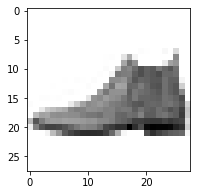

In [86]:
plt.figure(figsize=(3,3))
plt.imshow(test_image[0], cmap=plt.cm.binary)
plt.show()

In [87]:
prediction = probability_model.predict(test_image)

In [88]:
class_names[np.argmax(prediction[0])]

'Ankle boot'